In [1]:
import importlib.util
spec = importlib.util.spec_from_file_location("bltmat", "/Users/claudiopierard/WRF/bltmat.py")
blt = importlib.util.module_from_spec(spec)
spec.loader.exec_module(blt)
import numpy as np
import matplotlib.pyplot as plt
#import BoundaryLayerToolbox as blt
from netCDF4 import Dataset as nc
import time

%matplotlib inline
import scipy.io as sio

In [2]:
coyoacan = blt.region()

In [3]:
tlalpan = blt.region()
blt.read_region(tlalpan, "/Users/claudiopierard/WRF/Datos/delegaciones_cdmx/tlalpan.xy")

In [4]:
blt.read_region(coyoacan, "/Users/claudiopierard/WRF/Datos/delegaciones_cdmx/coyoacan.xy")

In [9]:
net = nc('/Users/claudiopierard/WRF/Datos/WRF/48_wrfout_d02_2015-12-14_00.nc', 'r')

In [11]:
lats =net.variables['XLAT']

In [77]:
wrf = sio.loadmat("/Users/claudiopierard/WRF/Datos/WRF/03_24hrs_D2.mat")

In [78]:
wrf = blt.import_var_mat(wrf, 'Atmos')

In [89]:
wrf['HGT'].shape

(3, 3, 24, 31)

In [85]:
wrf['XLAT'][:,:, 0, 0]

array([[ 19.29242516,  19.29242516,  19.29242516],
       [ 19.24715614,  19.24715614,  19.24715614],
       [ 19.20187759,  19.20187759,  19.20187759]])

In [84]:
wrf['XLONG'][:,:, 0, 0]

array([[-99.19094086, -99.2388916 , -99.28684998],
       [-99.19094086, -99.2388916 , -99.28684998],
       [-99.19094086, -99.2388916 , -99.28684998]])

In [ ]:
y_range = range(135, 155)
x_range = range(80, 120)

fig = plt.figure(figsize=(13,13))
Cs = plt.contour(wrf['XLONG'][], colors= 'k')
plt.clabel(Cs, fontsize = 8) 
plt.plot(coyoacan.lon, coyoacan.lat)
plt.plot(tlalpan.lon, tlalpan.lat)
plt.scatter(xlong[0, x_range, y_range], xlat[0,x_range, y_range], s = 1)

In [17]:
wrf.keys()

dict_keys(['Z', 'HGT', 'U', 'V', 'T2', 'XLAT', 'PHB', 'PBLH_avg', 'PBLH', 'T', 'PH', 'PBLH_std', 'XLONG'])

In [7]:
xlat = net.variables['XLAT']
xlong = net.variables['XLONG']
relieve = net.variables['HGT']

In [8]:
relieve.shape

(24, 156, 273)

In [1]:
fig = plt.figure(figsize=(13,13))
Cs = plt.contour(xlong[0, :, :], xlat[0, :, :], relieve[0, :, :], colors= 'k')
plt.clabel(Cs, fontsize = 8) 
plt.plot(coyoacan.lon, coyoacan.lat)
plt.plot(tlalpan.lon, tlalpan.lat)
plt.scatter(xlong[0, :, :], xlat[0,:, :], s = 1)

NameError: name 'plt' is not defined

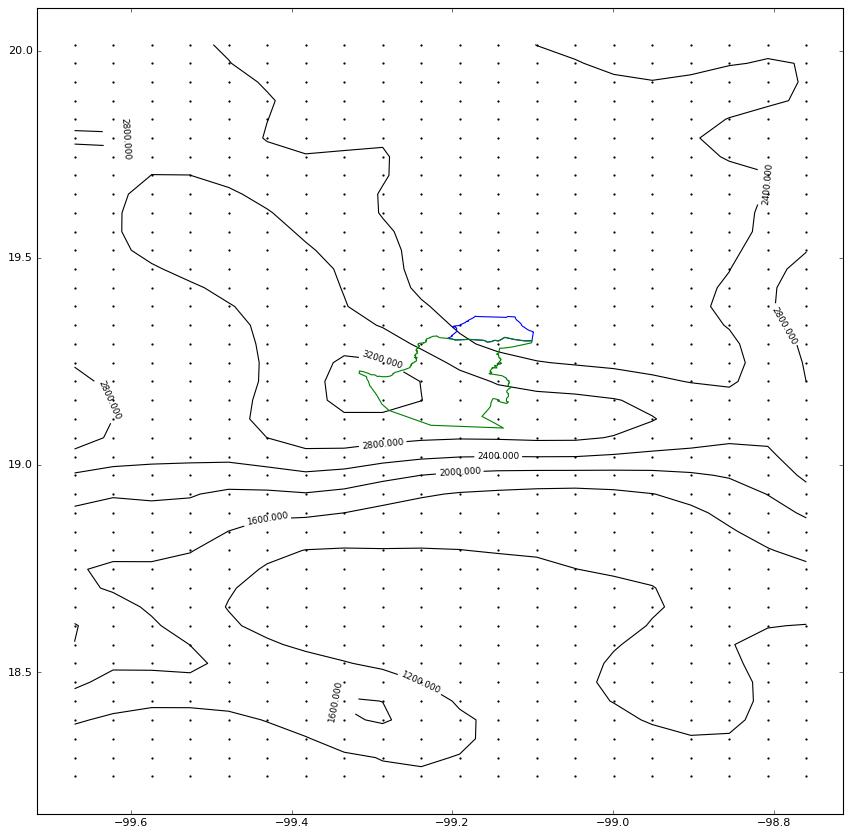

In [76]:
y_range = range(135, 155)
x_range = range(80, 120)

fig = plt.figure(figsize=(13,13))
Cs = plt.contour(xlong[0, x_range, y_range], xlat[0, x_range, y_range], relieve[0, x_range, y_range], colors= 'k')
plt.clabel(Cs, fontsize = 8) 
plt.plot(coyoacan.lon, coyoacan.lat)
plt.plot(tlalpan.lon, tlalpan.lat)
plt.scatter(xlong[0, x_range, y_range], xlat[0,x_range, y_range], s = 1)

In [10]:
xlat.shape

(24, 156, 273)

In [64]:
range(0, xlong.shape[2])

range(0, 273)

In [65]:
def points_in_region(region, x_long, x_lat):
    nx = []
    ny = []
    for i in range(0, x_long.shape[0]):
        for j in range(0, x_long.shape[1]):
            if blt.in_or_out(region, x_long[i,j], x_lat[i,j]) == True:
                nx.append(i)
                ny.append(j)
    #return nx, ny
    region.nx = nx
    region.ny = ny

In [68]:
begin = time.time()
points_in_region(tlalpan, xlong[0,:,:], xlat[0,:,:])
end = time.time()
print('Total time:', end - begin, 'seg')

Total time: -249.68116402626038 seg


In [90]:
tlalpan.nx

[99, 99, 100, 100, 100, 100, 101, 101, 101, 101, 102, 102, 102, 103, 103, 103]

In [91]:
tlalpan.ny

[144,
 145,
 143,
 144,
 145,
 146,
 143,
 144,
 145,
 146,
 144,
 145,
 146,
 144,
 145,
 146]

In [43]:
begin = time.time()
points_in_region(tlalpan, xlong[0,:,:], xlat[0,:,:])
end = time.time()

print(end -begin, ' segs')

5.151416063308716  segs


In [50]:
tlalpan.ny

[]

IndexError: list index out of range

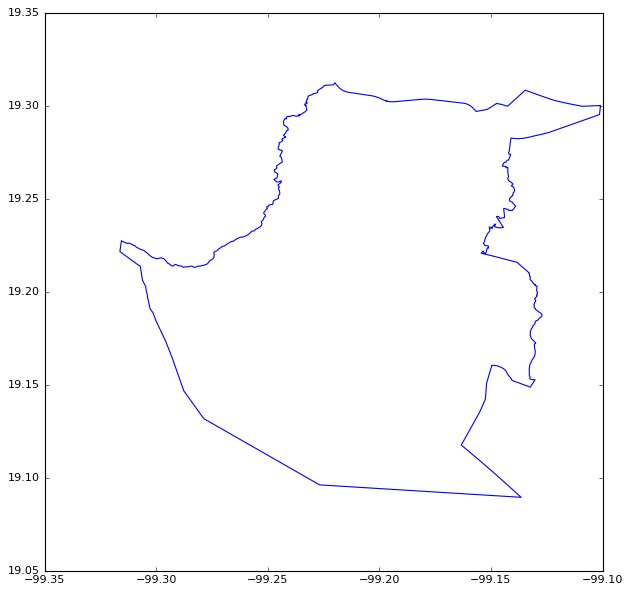

In [51]:
fig = plt.figure(figsize=(9,9))
plt.plot(tlalpan.lon, tlalpan.lat)
for i in range(0, 2):
    plt.scatter(xlong[0,tlalpan.nx[i], tlalpan.ny[i]], xlat[0,tlalpan.nx[i], tlalpan.ny[i]])

In [22]:
in_region(coyoacan, xlong[0,:,:], xlat[0,:,:])

([], [])

In [7]:
GustavoAMadero = blt.region()
blt.read_region(GustavoAMadero, "/Users/claudiopierard/WRF/Datos/delegaciones_cdmx/gustavo_a_madero.xy")

In [13]:
np.linspace(-99.16, 99.06)

array([-99.16      , -95.11469388, -91.06938776, -87.02408163,
       -82.97877551, -78.93346939, -74.88816327, -70.84285714,
       -66.79755102, -62.7522449 , -58.70693878, -54.66163265,
       -50.61632653, -46.57102041, -42.52571429, -38.48040816,
       -34.43510204, -30.38979592, -26.3444898 , -22.29918367,
       -18.25387755, -14.20857143, -10.16326531,  -6.11795918,
        -2.07265306,   1.97265306,   6.01795918,  10.06326531,
        14.10857143,  18.15387755,  22.19918367,  26.2444898 ,
        30.28979592,  34.33510204,  38.38040816,  42.42571429,
        46.47102041,  50.51632653,  54.56163265,  58.60693878,
        62.6522449 ,  66.69755102,  70.74285714,  74.78816327,
        78.83346939,  82.87877551,  86.92408163,  90.96938776,
        95.01469388,  99.06      ])

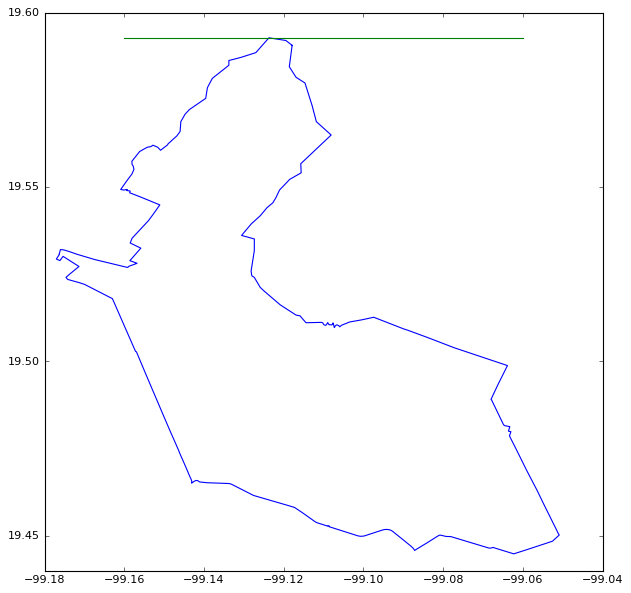

In [15]:
fig = plt.figure(figsize=(9,9))
plt.plot(GustavoAMadero.lon, GustavoAMadero.lat)
plt.plot(np.linspace(-99.16, -99.06), np.zeros_like(np.linspace(-99.16, 99.06)) + max(GustavoAMadero.lat))

In [16]:
max(GustavoAMadero.lat)

19.592757280000001

In [17]:
milpaAlta = blt.region()
blt.read_region(milpaAlta, "/Users/claudiopierard/WRF/Datos/delegaciones_cdmx/milpa_alta.xy")

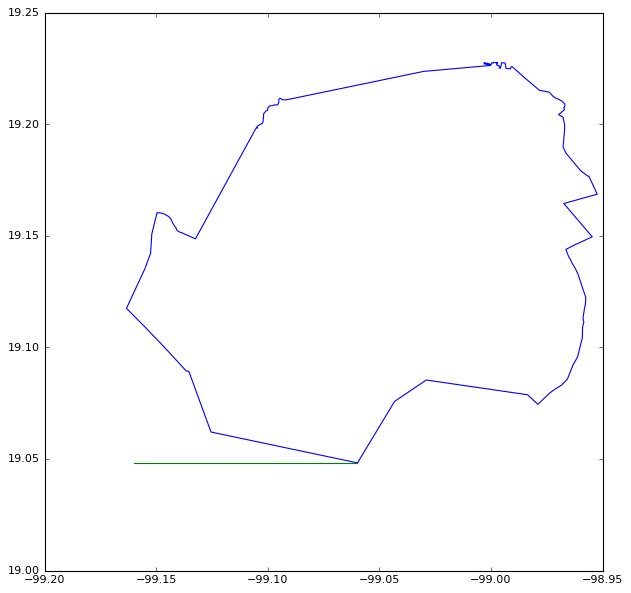

In [31]:
fig = plt.figure(figsize=(9,9))
plt.plot(milpaAlta.lon, milpaAlta.lat)
plt.plot(np.linspace(-99.16, -99.06), np.zeros_like(np.linspace(-99.16, 99.06)) + min(milpaAlta.lat))

In [23]:
min(milpaAlta.lat)

19.048236663800001

In [32]:
milpaAlta.lat.min()

19.048236663800001

In [33]:
tlahuac = blt.region()
blt.read_region(tlahuac, "/Users/claudiopierard/WRF/Datos/delegaciones_cdmx/tlahuac.xy")

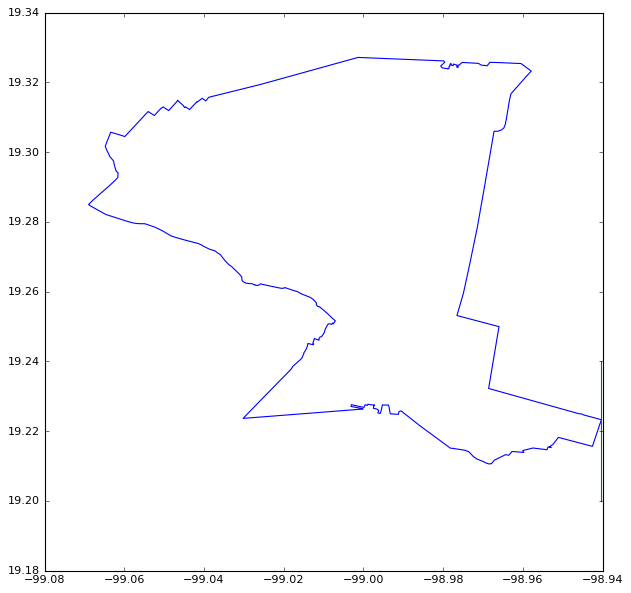

In [38]:
fig = plt.figure(figsize=(9,9))
plt.plot(tlahuac.lon, tlahuac.lat)
plt.plot(np.zeros_like(np.linspace(19.2, 19.24)) + max(tlahuac.lon), np.linspace(19.2, 19.24))

In [39]:
max(tlahuac.lon)

-98.940302812100001

In [40]:
cuajimalpa = blt.region()
blt.read_region(cuajimalpa, "/Users/claudiopierard/WRF/Datos/delegaciones_cdmx/cuajimalpa.xy")

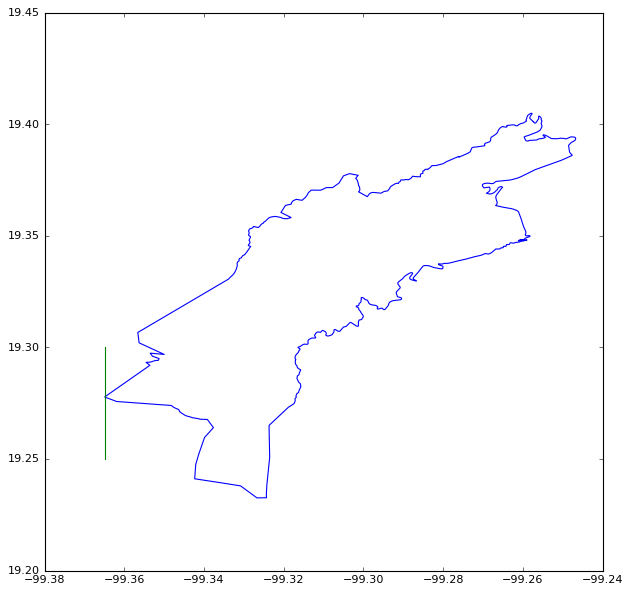

In [43]:
fig = plt.figure(figsize=(9,9))
plt.plot(cuajimalpa.lon, cuajimalpa.lat)
plt.plot(np.zeros_like(np.linspace(19.25, 19.3)) + min(cuajimalpa.lon), np.linspace(19.25, 19.3))

In [44]:
min(cuajimalpa.lon)

-99.364924203900003